## Problem 1: SVD

In [2]:
import numpy as np
from scipy import linalg as la
import math

def truncated_svd(A, k=None):
    AT = A.T
    ATA = np.dot(AT, A)
    eigenvals, eigenvectors = la.eig(ATA)
    singulars = np.sqrt(eigenvals)
    if k==None:
        singulars = singulars
    else:
        ordered = np.sort(singulars)
        minimum = ordered[-k]
        singulars = singulars[singulars >= minimum]
        indices = []
        for val in singulars:
            indices.append(singulars.tolist().index(val))
        eigenvectors = eigenvectors[:,indices]
    V = eigenvectors
    cols_U = []
    i = 0
    while i < len(singulars):
        product = (1/singulars[i])*np.dot(A, V[:,i])
        cols_U.append(product)
        i+=1
    U = np.column_stack(cols_U)
    sigma = np.diag(singulars)
    return U, singulars, V.T

In [3]:
#Test whether the function works

A = np.random.random((4,4))
print(A)

print(truncated_svd(A,2))

U = truncated_svd(A,3)[0]
Sigma = np.diag(truncated_svd(A,3)[1])
VT = truncated_svd(A,3)[2]

print(np.dot(np.dot(U, Sigma), VT))

[[ 0.68344347  0.14014201  0.11553386  0.1290784 ]
 [ 0.15580072  0.87560675  0.00281144  0.56565785]
 [ 0.37734367  0.34290816  0.07773102  0.07402086]
 [ 0.01908449  0.64867973  0.34546364  0.21235679]]
(array([[ 0.30441830+0.j,  0.83987645+0.j],
       [ 0.73892905+0.j, -0.29897750+0.j],
       [ 0.32966569+0.j,  0.34399911+0.j],
       [ 0.50262698+0.j, -0.29476195+0.j]]), array([ 1.37305308+0.j,  0.69414938+0.j]), array([[ 0.33295728,  0.82208188,  0.17225312,  0.4285437 ],
       [ 0.9387139 , -0.3130893 ,  0.03040193, -0.14095042]]))
[[ 0.68612105+0.j  0.16156019+0.j  0.09379972+0.j  0.09464727+0.j]
 [ 0.15626250+0.j  0.87930057+0.j -0.00093687+0.j  0.55971980+0.j]
 [ 0.37215338+0.j  0.30139060+0.j  0.11986105+0.j  0.14076307+0.j]
 [ 0.02018816+0.j  0.65750807+0.j  0.33650507+0.j  0.19816467+0.j]]


The output A is close to the original A so the function works!

## Problem 2

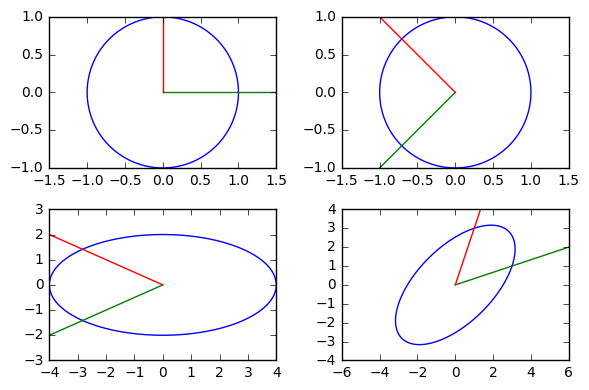

In [51]:
from matplotlib import pyplot as plt

A = np.array([[3,1],[1,3]])
U, sigma, V = la.svd(A)
Sigma = np.diag(sigma)

theta = np.linspace(0, 2*np.pi, 200)
x = np.cos(theta)
y = np.sin(theta)
S = np.vstack((x,y))

e1 = np.array([1,0])
e2 = np.array([0,1])

e1x = e1[0]*theta
e1y = e1[1]*theta
E1 = np.vstack([e1x, e1y])

e2x = e2[0]*theta
e2y = e2[1]*theta
E2 = np.vstack([e2x, e2y])

plt.subplot(221)
plt.plot(x,y)
plt.plot(e1x, e1y)
plt.plot(e2x, e2y)
plt.axis([-1.5, 1.5, -1.0, 1.0])

plt.subplot(222)
S1 = np.dot(V, S)
plt.plot(S1[0],S1[1])
E11 = np.dot(V, E1)
E21 = np.dot(V, E2)
plt.plot(E11[0], E11[1])
plt.plot(E21[0], E21[1])
plt.axis([-1.5, 1.5, -1.0, 1.0])

plt.subplot(223)
S2 = np.dot(Sigma, S1)
plt.plot(S2[0],S2[1])
E12 = np.dot(Sigma, E11)
E22 = np.dot(Sigma, E21)
plt.plot(E12[0], E12[1])
plt.plot(E22[0], E22[1])
plt.axis([-4,4,-3,3])

plt.subplot(224)
S3 = np.dot(U, S2)
plt.plot(S3[0],S3[1])
E13 = np.dot(U, E12)
E23 = np.dot(U, E22)
plt.plot(E13[0], E13[1])
plt.plot(E23[0], E23[1])
plt.axis([-6,6,-4,4])

plt.tight_layout()
plt.show()

## Problem 3

In [57]:
def svd_approx(A, k):
    U, s, VT = la.svd(A, full_matrices=False)
    S = np.diag(s[:k])
    Ahat = U[:,:k].dot(S).dot(VT[:k,:])
    return Ahat

## Problem 4

In [72]:
def lowest_rank_approx(A, e):
    U, s, VT = la.svd(A, full_matrices=False)
    n = len(s)
    k = 0
    while (k<n and s[k]>e):
        S = np.diag(s[:k])
        Ahat = U[:,:k].dot(S).dot(VT[:k,k])
        k += 1
    return k       

In [73]:
#Testing function

A = np.random.random((4,4))
e = 0.1
print(lowest_rank_approx(A,e))

3


## Problem 5

In [133]:
def compress_img(filename, k):
    X = plt.imread(filename).astype(float)
    
    R0 = X[:,:,0]
    G0 = X[:,:,1]
    B0 = X[:,:,2]
    
    m = np.shape(R0)[0]
    n = np.shape(R0)[1]
    
    R=(svd_approx(R0,k))/255
    G=(svd_approx(G0,k))/255
    B=(svd_approx(B0,k))/255
    X = X/255
    
    for val in R, G, B:
        mask1 = val>1
        val[mask1] = 1
        mask2 = val<0
        val[mask2] = 0
    
    plt.subplot(121)
    plt.title("Original Image")
    plt.imshow(X)
    
    compress =np.zeros((m,n,3))
    compress[:,:,0]=R
    compress[:,:,1]=G
    compress[:,:,2]=B
    
    plt.subplot(122)
    plt.title("Rank "+str(k)+" Approximation")
    plt.imshow(compress)
    plt.show()
    
    

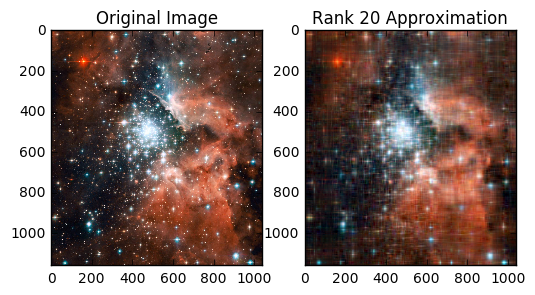

In [134]:
compress_img('hubble.jpg',20)